In [ ]:
import pandas as pd
import numpy as np
import nltk
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from tqdm import tqdm
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Magisterka/pre_processed_songs_data.csv")

Nowy notatnik, bo tamtemu już umierał RAM. Tutaj otrzymujemy 3 rodzaje lyricsów:

  * tokenizacja + lemmatyzacja
  * tokenizacja + stemming
  * tokenizacja + lemmatyzacja + usuwanie stopwords

In [ ]:


# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Initialize lemmatizer and stemmer
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

# Function to lemmatize lyrics
def lemmatize_lyrics(lyrics):
    tokens = word_tokenize(lyrics)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return ' '.join(lemmatized_tokens)

# Function to stem lyrics
def stem_lyrics(lyrics):
    tokens = word_tokenize(lyrics)
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return ' '.join(stemmed_tokens)

# Function to lemmatize lyrics and remove stop-words
def lemmatize_and_remove_stopwords(lyrics):
    tokens = word_tokenize(lyrics)
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens if token.lower() not in stop_words]
    return ' '.join(lemmatized_tokens)

# Create sets
tqdm.pandas()
df['Lyric_Lemmatized'] = df['Lyric'].progress_apply(lemmatize_lyrics)
df['Lyric_Stemmed'] = df['Lyric'].progress_apply(stem_lyrics)
df['Lyric_Lemmatized_NoStop'] = df['Lyric'].progress_apply(lemmatize_and_remove_stopwords)

# Display the updated DataFrame
print("\nDataFrame with different preprocessing techniques:")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
100%|██████████| 133733/133733 [07:46<00:00, 286.39it/s]



DataFrame with different preprocessing techniques:


In [ ]:
#df.to_csv("/content/drive/MyDrive/Magisterka/ready_songs_data.csv", index=False)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Magisterka/ready_songs_data.csv")

In [ ]:
df['Lyric'][55746]

'are you with me are you with me are you with me'

In [ ]:
df['Lyric_Lemmatized'][200]

'yeah yeah yeah yeah we started out good friend said you are the kind of man that take every girl for a fool shoot shoot shoot a fantastic into romantic say what romantic into fantastic we came here to rock the microphone we came here to rock the microphone our aim is to break you down to the bone our aim is to break you down to the bone let u talk about we started out good friend said you are the kind of man that take every girl for a fool we came here to rock the microphone we came here to rock the microphone our aim is to break you down to the bone our aim is to break you down to the bone yeah yeah yeah yeah'

In [ ]:
df['Lyric_Stemmed'][200]

'yeah yeah yeah yeah we start out good friend said you are the kind of man that take everi girl for a fool shoot shoot shoot a fantast into romant say what romant into fantast we came here to rock the microphon we came here to rock the microphon our aim is to break you down to the bone our aim is to break you down to the bone let us talk about we start out good friend said you are the kind of man that take everi girl for a fool we came here to rock the microphon we came here to rock the microphon our aim is to break you down to the bone our aim is to break you down to the bone yeah yeah yeah yeah'

In [ ]:
df['Lyric_Lemmatized_NoStop'][55746]

nan

In [ ]:
df.loc[[200]]

,Artist,SName,Lyric,valence,energy,Country,HipHop,Indie,Jazz,HeavyMetal,Rock,Pop,Rap,Lyric_Lemmatized,Lyric_Stemmed,Lyric_Lemmatized_NoStop
200,the go team,ladyflash,yeah yeah yeah yeah we started out good friend...,NaN,NaN,0,0,1,0,0,0,0,0,yeah yeah yeah yeah we started out good friend...,yeah yeah yeah yeah we start out good friend s...,yeah yeah yeah yeah started good friend said k...


In [ ]:
df = df.drop(index=55746)

In [ ]:
# Trzeba jeszcze usunac liczby o czym zapomnialam niestety
def remove_numbers(df: pd.DataFrame, column) -> pd.DataFrame:
    df[column] = df[column].str.replace(r'\d+', '', regex=True)
    #dodatkowo wyrzucamy apostrofy bo nam psują
    df[column] = df[column].str.replace("'","")
    return df

In [ ]:
df = remove_numbers(df, 'Lyric')
df = remove_numbers(df, 'Lyric_Lemmatized')
df = remove_numbers(df, 'Lyric_Stemmed')
df = remove_numbers(df, 'Lyric_Lemmatized_NoStop')

# Analiza zbioru

In [ ]:
! pip install wordcloud

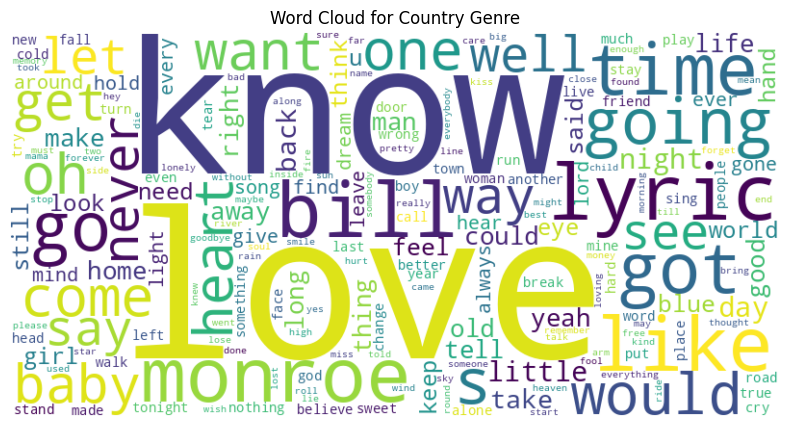

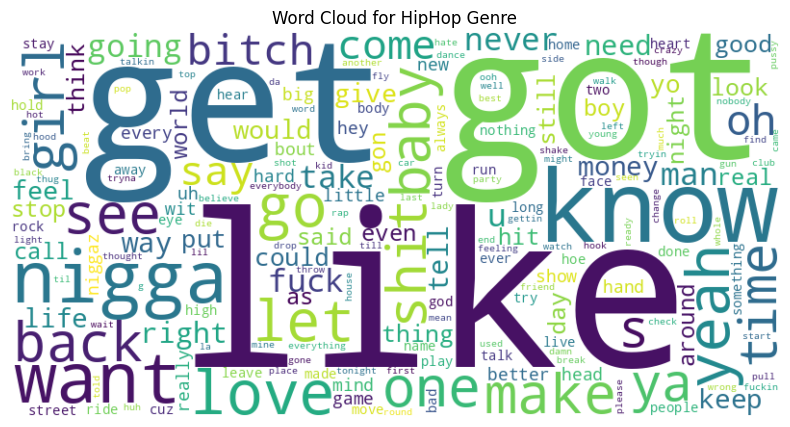

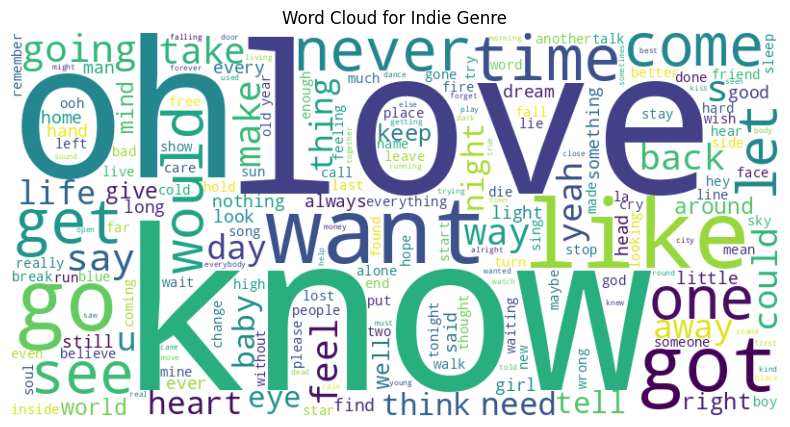

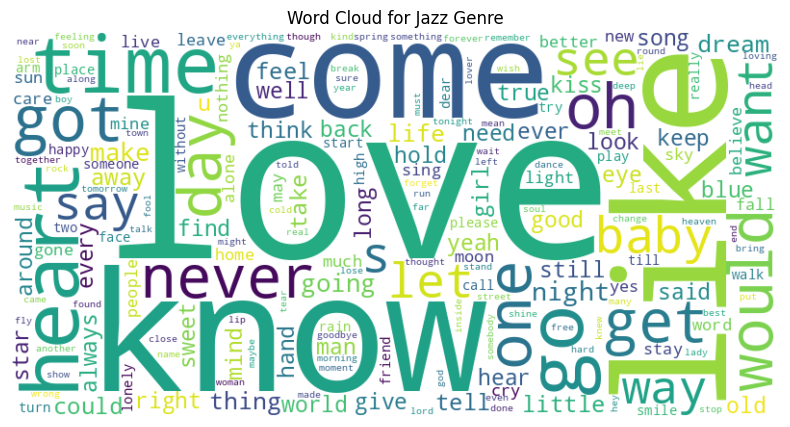

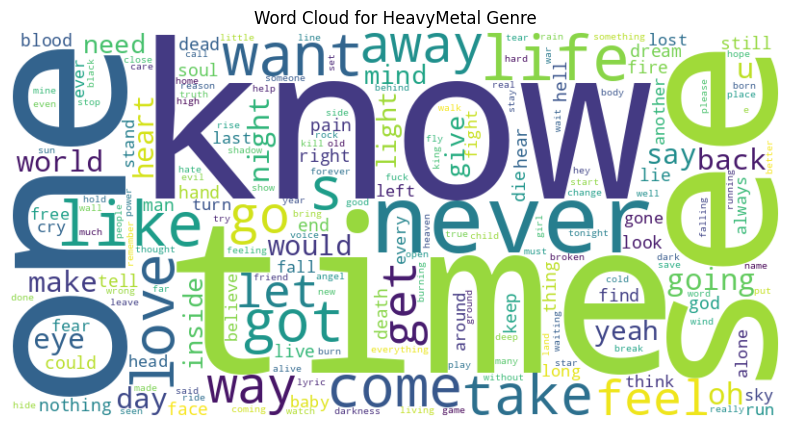

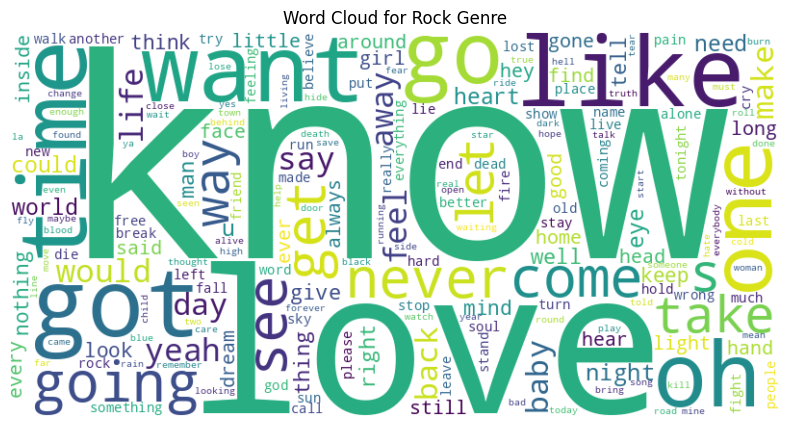

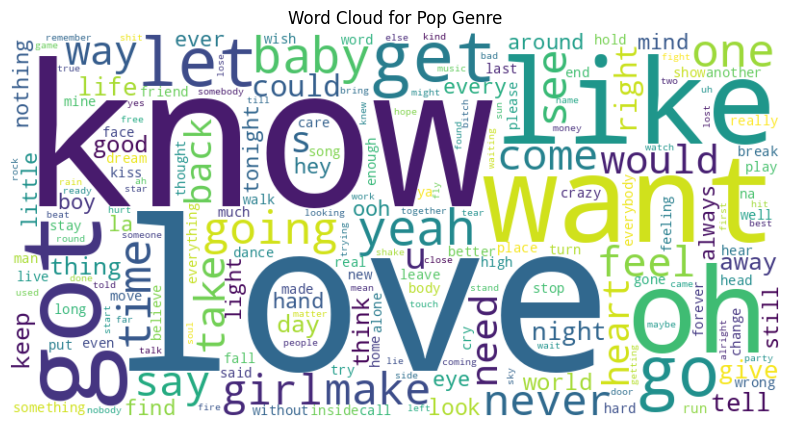

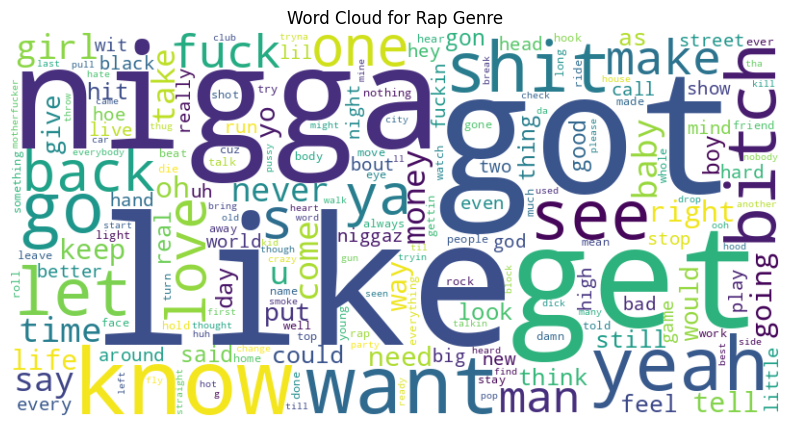

In [ ]:
# Get word frequencies
def get_word_frequencies(lyrics):
    words = " ".join(lyrics).split()
    return Counter(words)

word_frequencies = {}
for genre in df.columns[5:13]:
    lyrics = df[df[genre] == 1]['Lyric_Lemmatized_NoStop'].tolist()
    word_frequencies[genre] = get_word_frequencies(lyrics)

def plot_word_cloud(word_frequencies, genre):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_frequencies[genre])
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for {genre} Genre')
    plt.axis('off')
    plt.show()

# Plot word clouds for each genre
for genre in word_frequencies.keys():
    plot_word_cloud(word_frequencies, genre)


In [ ]:
# Analiza sentimentu

nltk.download('vader_lexicon')

def analyze_sentiment_with_progress(df):
    sia = SentimentIntensityAnalyzer()
    tqdm.pandas()
    df['Sentiment'] = df['Lyric'].progress_apply(lambda x: sia.polarity_scores(x)['compound'])
    return df

df_with_sentiment = analyze_sentiment_with_progress(df)


In [ ]:
df_with_sentiment

,Artist,SName,Lyric,valence,energy,Country,HipHop,Indie,Jazz,HeavyMetal,Rock,Pop,Rap,Lyric_Lemmatized,Lyric_Stemmed,Lyric_Lemmatized_NoStop,Sentiment
0,audrye sessions,contagious,leave now while you can because growing old ju...,NaN,NaN,0,0,1,0,0,0,0,0,leave now while you can because growing old ju...,leav now while you can becaus grow old just in...,leave growing old intoxicates mind word drip l...,-0.9201
1,audrye sessions,dust and bones,we have been poisoned tracked down herded to s...,NaN,NaN,0,0,1,0,0,0,0,0,we have been poisoned tracked down herded to s...,we have been poison track down herd to stand b...,poisoned tracked herded stand behind mind one ...,0.9780
2,audrye sessions,new year's day,the needles in hand but i cannot sew my hearts...,NaN,NaN,0,0,1,0,0,0,0,0,the needle s in hand but i can not sew my hear...,the needl s in hand but i can not sew my heart...,needle s hand sew heart s worn thing like swea...,-0.5647
3,audrye sessions,perfect sometimes,i catch every whisper surrounding your head yo...,NaN,NaN,0,0,1,0,0,0,0,0,i catch every whisper surrounding your head yo...,i catch everi whisper surround your head you g...,catch every whisper surrounding head got look ...,-0.9803
4,audrye sessions,relentless,get off of work come home pass out my lifes be...,NaN,NaN,0,0,1,0,0,0,0,0,get off of work come home pas out my life s be...,get off of work come home pass out my life s b...,get work come home pas life s become cancer cr...,-0.9429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
133728,Danny Brown,​uknowhatimsayin¿ (Ft. Obongjayar),clock tickin know you cannot be playin know wh...,NaN,NaN,0,1,0,0,0,0,0,0,clock tickin know you can not be playin know...,clock tickin know you can not be playin know...,clock tickin know playin know sayin got get...,0.5930
133729,Taylor Swift,​willow (Dancing witch version) (Elvira remix),i am like the water when your ship rolled in t...,NaN,NaN,0,0,0,0,0,0,1,0,i am like the water when your ship rolled in t...,i am like the water when your ship roll in tha...,like water ship rolled night rough surface cut...,0.9982
133730,Fleet Foxes,"– Naiads, Cassadies",the storm suddenly breaks in a car on the coas...,NaN,NaN,0,0,1,0,0,0,0,0,the storm suddenly break in a car on the coast...,the storm suddenli break in a car on the coast...,storm suddenly break car coast stole life turn...,0.5312
133731,Babymetal,↑↓←→BBAB,game over or continue？ do not give up mōsugusa...,NaN,NaN,0,0,0,0,1,1,0,0,game over or continue？ do not give up mōsugusa...,game over or continue？ do not give up mōsugusa...,game continue？ give mōsugusa save point high s...,0.9953


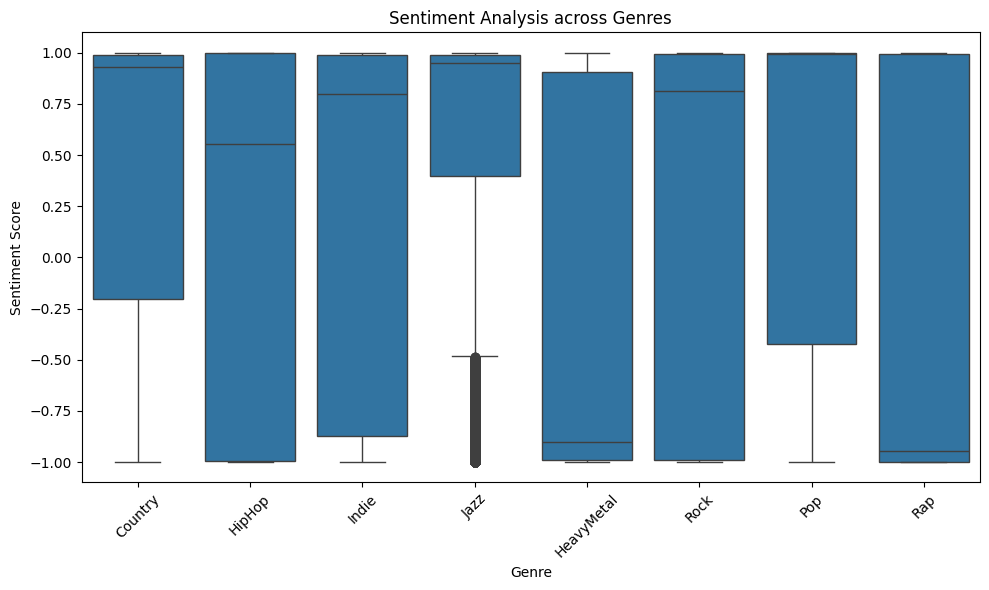

In [ ]:
# Box plot to compare sentiment across genres
plt.figure(figsize=(10, 6))

# Gather data for boxplot
data_to_plot = pd.melt(df_with_sentiment, id_vars=['Sentiment'], value_vars=df_with_sentiment.columns[5:13], var_name='Genre', value_name='Belongs')

# Filter and drop data where Belongs is 0
data_to_plot = data_to_plot[data_to_plot['Belongs'] != 0]

sns.boxplot(x='Genre', y='Sentiment', data=data_to_plot)
plt.title('Sentiment Analysis across Genres')
plt.xlabel('Genre')
plt.ylabel('Sentiment Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Topic modelling with LDA

Genre: Country
Topic 1:
love, know, time, heart, like, want, baby, oh, way, say

Topic 2:
got, going, like, man, little, come, home, old, oh, said

Topic 3:
lyric, monroe, blue, baby, old, love, lonesome, little, babe, kentucky



<ipython-input-74-7bcdfee65859>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data['Topic'] = topic_assignments.argmax(axis=1)


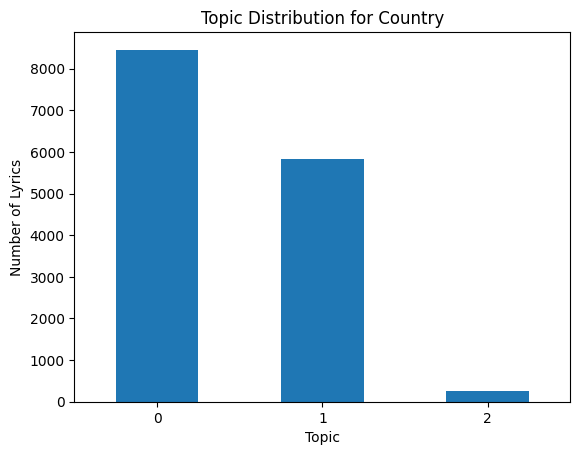

Genre: HipHop
Topic 1:
love, know, time, got, like, life, want, say, going, feel

Topic 2:
nigga, like, got, shit, bitch, fuck, ya, money, know, man

Topic 3:
girl, want, like, baby, yeah, got, oh, know, let, love



<ipython-input-74-7bcdfee65859>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data['Topic'] = topic_assignments.argmax(axis=1)


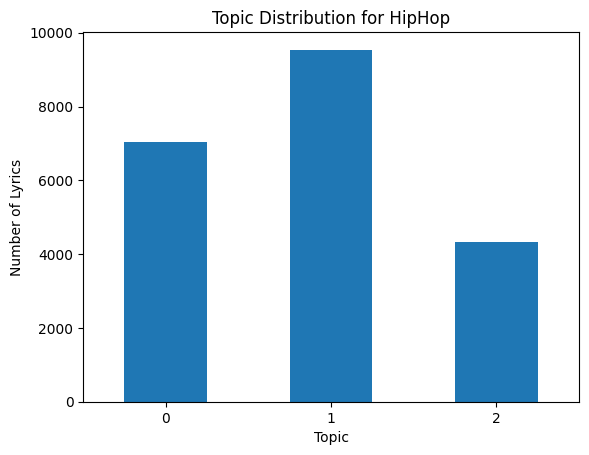

Genre: Indie
Topic 1:
love, heart, come, like, let, eye, away, light, night, la

Topic 2:
know, want, time, say, like, way, thing, tell, day, think

Topic 3:
oh, got, yeah, love, baby, like, want, going, girl, know



<ipython-input-74-7bcdfee65859>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data['Topic'] = topic_assignments.argmax(axis=1)


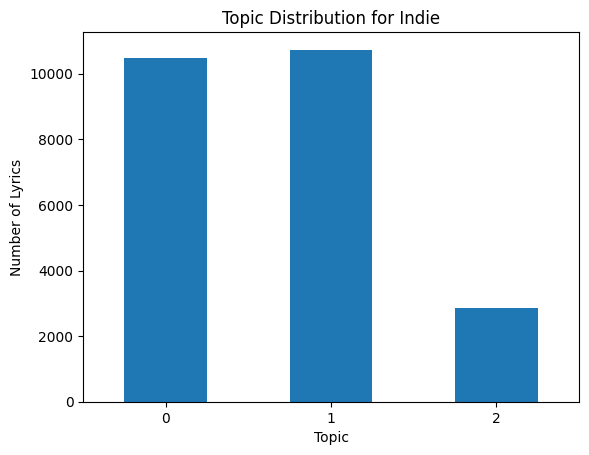

Genre: Jazz
Topic 1:
love, heart, know, day, dream, time, come, night, let, away

Topic 2:
like, know, going, night, day, time, long, home, soul, life

Topic 3:
got, baby, like, know, want, oh, come, going, yeah, man



<ipython-input-74-7bcdfee65859>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data['Topic'] = topic_assignments.argmax(axis=1)


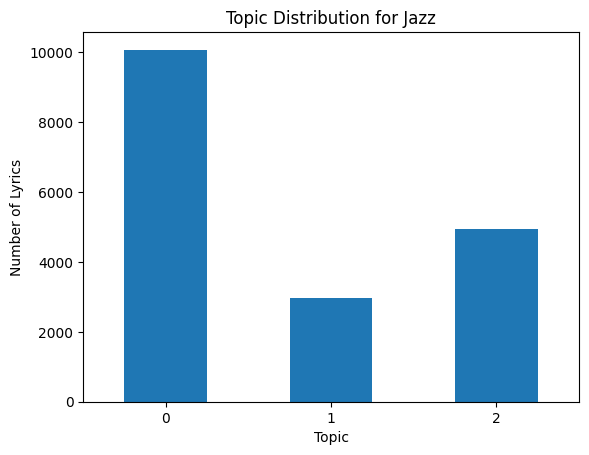

Genre: HeavyMetal
Topic 1:
night, light, come, sky, god, world, dream, eye, soul, hell

Topic 2:
got, want, know, love, going, like, oh, yeah, say, come

Topic 3:
life, time, away, feel, inside, pain, way, know, eye, world



<ipython-input-74-7bcdfee65859>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data['Topic'] = topic_assignments.argmax(axis=1)


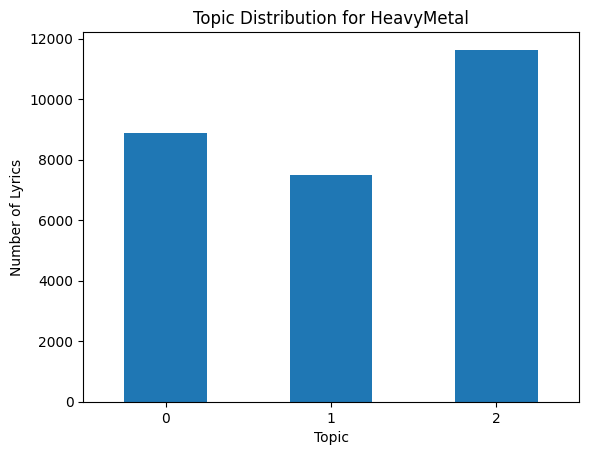

Genre: Rock
Topic 1:
time, life, away, day, eye, world, come, light, night, dream

Topic 2:
got, going, like, yeah, man, hey, rock, come, said, little

Topic 3:
love, know, want, oh, baby, say, time, got, like, need



<ipython-input-74-7bcdfee65859>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data['Topic'] = topic_assignments.argmax(axis=1)


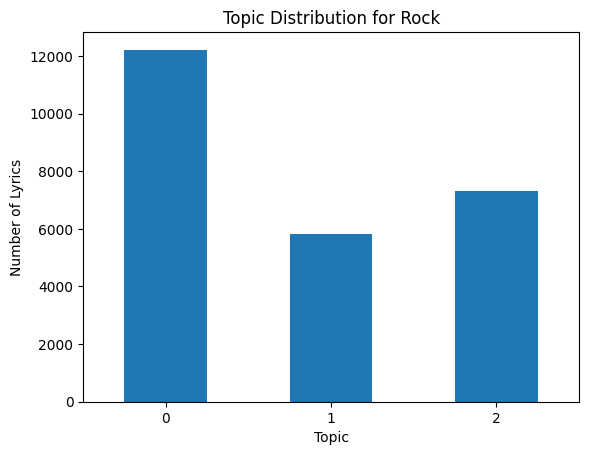

Genre: Pop
Topic 1:
love, oh, know, want, baby, yeah, feel, need, say, got

Topic 2:
time, life, know, day, like, away, world, come, let, going

Topic 3:
got, like, girl, yeah, want, let, know, going, hey, ya



<ipython-input-74-7bcdfee65859>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data['Topic'] = topic_assignments.argmax(axis=1)


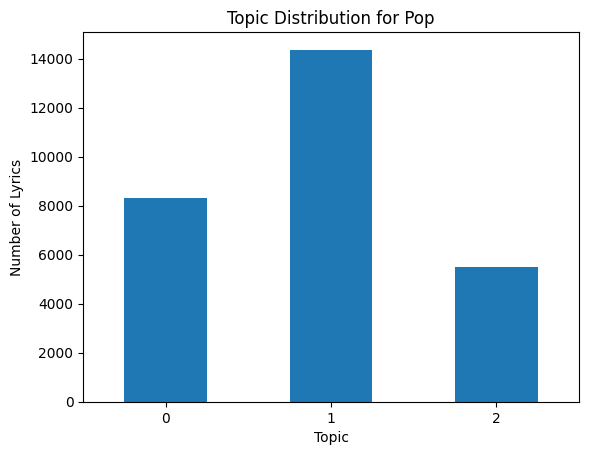

Genre: Rap
Topic 1:
nigga, like, got, bitch, shit, fuck, ya, money, know, yo

Topic 2:
know, like, got, love, time, life, want, say, day, let

Topic 3:
like, yeah, got, girl, want, know, baby, oh, let, love



<ipython-input-74-7bcdfee65859>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_data['Topic'] = topic_assignments.argmax(axis=1)


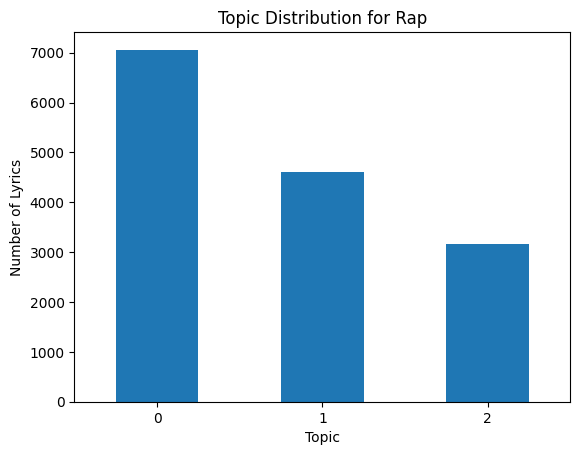

In [ ]:
# Topic modeling dla każdego genre
genres = ["Country", "HipHop", "Indie", "Jazz", "HeavyMetal", "Rock", "Pop", "Rap"]

for genre in genres:
    genre_data = df[df[genre] == 1]

    # Wektoryzujemy
    vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=1000, stop_words='english')
    X = vectorizer.fit_transform(genre_data['Lyric_Lemmatized_NoStop'])

    # Zaaplikujemy LDA model
    lda_model = LatentDirichletAllocation(n_components=3, max_iter=10, learning_method='online', random_state=42)
    lda_model.fit(X)

    # Ekstrakcja topików i keywords
    feature_names = vectorizer.get_feature_names_out()
    num_top_words = 10

    print(f"Genre: {genre}")
    for topic_idx, topic in enumerate(lda_model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        print()

    topic_assignments = lda_model.transform(X)
    genre_data['Topic'] = topic_assignments.argmax(axis=1)

    topic_counts = genre_data['Topic'].value_counts().sort_index()
    topic_counts.plot(kind='bar', title=f'Topic Distribution for {genre}')
    plt.xlabel('Topic')
    plt.ylabel('Number of Lyrics')
    plt.xticks(rotation=0)
    plt.show()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


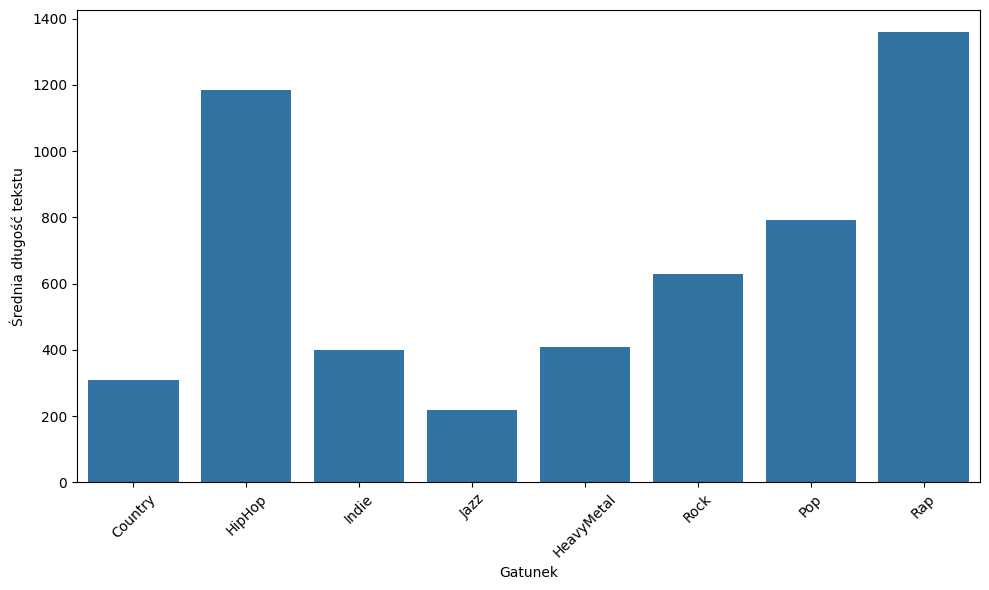

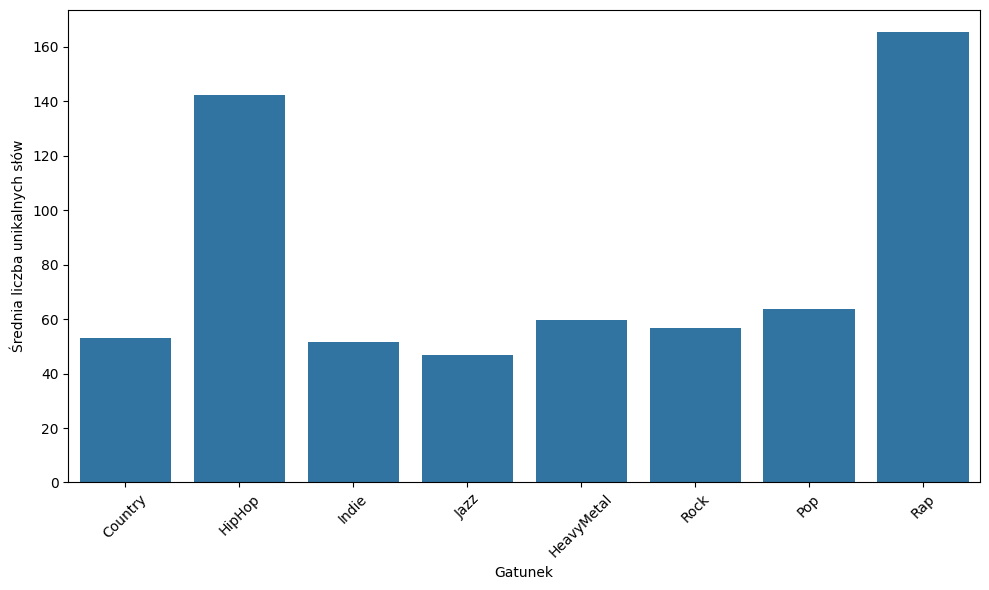

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))

def calculate_metrics(df):
    df['Lyric_Length'] = df['Lyric'].apply(lambda x: len(word_tokenize(x)))
    df['Unique_Words'] = df['Lyric'].apply(lambda x: len(set(word_tokenize(x.lower())) - stop_words))

    mean_lyric_length = {}
    mean_unique_words = {}

    for genre in genres:
        genre_filter = df[genre] == 1
        mean_lyric_length[genre] = df.loc[genre_filter, 'Lyric_Length'].mean()
        mean_unique_words[genre] = df.loc[genre_filter, 'Unique_Words'].mean()

    return mean_lyric_length, mean_unique_words

mean_lyric_length, mean_unique_words = calculate_metrics(df)

# Plotting mean lyric length
plt.figure(figsize=(10, 6))
sns.barplot(x=list(mean_lyric_length.keys()), y=list(mean_lyric_length.values()))
plt.xlabel('Gatunek')
plt.ylabel('Średnia długość tekstu')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plotting number of unique words
plt.figure(figsize=(10, 6))
sns.barplot(x=list(mean_unique_words.keys()), y=list(mean_unique_words.values()))
plt.xlabel('Gatunek')
plt.ylabel('Średnia liczba unikalnych słów')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.to_csv("/content/drive/MyDrive/Magisterka/for_training_songs_data.csv", index=False)